In [6]:
particle_dir = "../output/particles_tell/particles/"

In [11]:
import yaml
import numpy as np
import os

In [13]:
Npart = len(os.listdir(particle_dir))
Npart

1000

In [15]:
data = {}
data["r"] = np.zeros(Npart, dtype=np.float64)
data["phi"] = np.zeros(Npart, dtype=np.float64)
data["rho"] = np.zeros(Npart, dtype=np.float64)
data["Dg"] = np.zeros(Npart, dtype=np.float64)
data["Dd"] = np.zeros(Npart, dtype=np.float64)
data["Sc"] = np.zeros(Npart, dtype=np.float64)
data["St"] = np.zeros(Npart, dtype=np.float64)
data["mean"] = np.zeros(Npart, dtype=np.float64)
data["sigma"] = np.zeros(Npart, dtype=np.float64)
data["snv"] = np.zeros(Npart, dtype=np.float64)
data["dt"] = np.zeros(Npart, dtype=np.float64)
data["deltar"] = np.zeros(Npart, dtype=np.float64)
data["drho_dr"] = np.zeros(Npart, dtype=np.float64)
data["n_rad"] = np.zeros(Npart, dtype=np.uint64)
data["n_az"] = np.zeros(Npart, dtype=np.uint64)
data["cell_size"] = np.zeros(Npart, dtype=np.float64)

In [17]:
for f in os.listdir(particle_dir):
    with open(particle_dir + f, "r") as infile:
        p = yaml.safe_load(infile)
        i = int(f)
        for key, val in p.items():
            data[key][i] = val

In [18]:
data

{'r': array([24.1209 , 34.0428 , 12.6038 , 19.6289 , 16.3186 , 26.2787 ,
         6.47368, 32.2355 , 29.1047 , 30.586  ,  8.26696,  6.27351,
         9.67053, 18.548  ,  4.87193,  7.66547, 24.7054 , 25.7367 ,
        25.7673 , 17.1604 , 14.1823 , 31.3555 ,  1.52929, 38.9059 ,
         3.17287, 18.2267 , 19.7548 , 36.8112 , 34.739  , 36.9251 ,
         1.36491, 33.8141 , 22.56   ,  6.71123, 12.2506 , 16.4478 ,
        35.7706 , 39.1643 , 17.061  , 13.2155 , 26.7271 , 16.3999 ,
        19.3352 , 15.955  ,  5.01167, 22.5208 , 13.5189 ,  4.79314,
        21.9439 , 14.7402 , 36.2813 ,  7.50705, 17.0445 , 39.3204 ,
         2.97294,  9.99895, 30.25   , 14.2204 , 19.0746 , 24.7219 ,
        20.501  , 39.7035 , 34.707  , 22.6155 ,  9.53123, 38.8392 ,
         3.20032, 39.0798 , 34.3299 , 27.4062 , 19.3104 ,  6.3516 ,
        36.2726 , 21.2687 , 17.5926 , 18.7891 ,  9.94823, 38.3406 ,
         6.99408,  9.38035, 30.1361 ,  7.82145, 33.7767 ,  5.86849,
        30.1328 , 30.2209 ,  9.15712,  3.45

In [19]:
inds = np.argsort(data["r"])
for key in data:
    data[key] = data[key][inds]

In [20]:
data

{'r': array([ 1.02697,  1.10441,  1.12485,  1.15788,  1.18515,  1.19224,
         1.20729,  1.30862,  1.34726,  1.34832,  1.36491,  1.36563,
         1.38089,  1.38132,  1.39643,  1.50221,  1.52929,  1.54074,
         1.59301,  1.64704,  1.6844 ,  1.84509,  1.84586,  1.89568,
         1.95657,  1.97284,  2.0045 ,  2.03324,  2.05569,  2.05605,
         2.08991,  2.0913 ,  2.1349 ,  2.1445 ,  2.15576,  2.17058,
         2.20754,  2.25017,  2.31709,  2.33559,  2.46504,  2.4728 ,
         2.47855,  2.52967,  2.5877 ,  2.7132 ,  2.73425,  2.79453,
         2.97294,  3.17287,  3.18267,  3.18328,  3.20032,  3.28009,
         3.28413,  3.37035,  3.3748 ,  3.39845,  3.4194 ,  3.42676,
         3.45849,  3.51298,  3.53822,  3.60352,  3.63763,  3.66372,
         3.74744,  3.79765,  3.79791,  3.93293,  4.15893,  4.18166,
         4.27588,  4.28724,  4.31797,  4.39126,  4.40793,  4.44168,
         4.5537 ,  4.5774 ,  4.63691,  4.67724,  4.68386,  4.69319,
         4.72918,  4.79314,  4.80128,  4.81

In [21]:
import h5py
with h5py.File("../fargo_particle_data.hdf5", "w") as outfile:
    for key, val in data.items():
        outfile.create_dataset(key, (len(val),), dtype=val.dtype)
        outfile[key][:] = val

In [22]:
[key for key in data]

['r',
 'phi',
 'rho',
 'Dg',
 'Dd',
 'Sc',
 'St',
 'mean',
 'sigma',
 'snv',
 'dt',
 'deltar',
 'drho_dr',
 'n_rad',
 'n_az',
 'cell_size']

In [23]:
import matplotlib.pyplot as plt

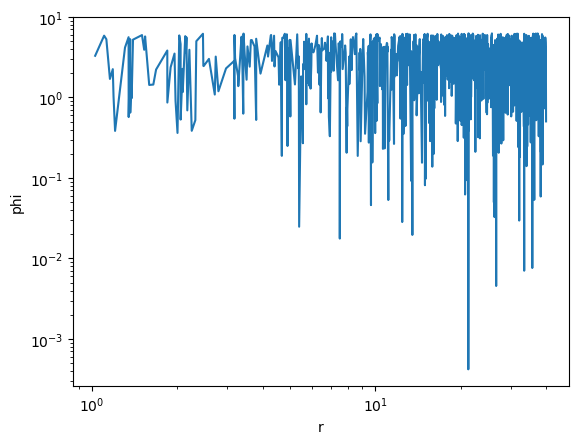

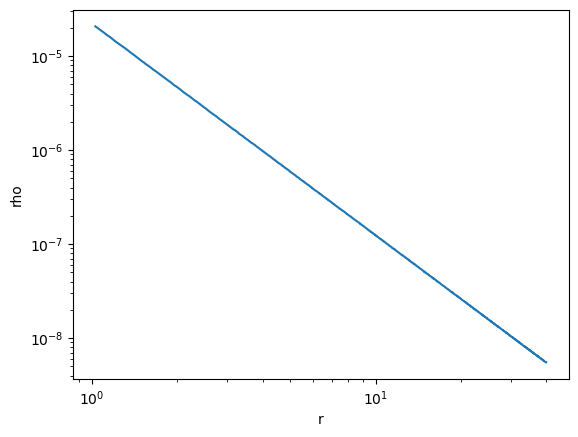

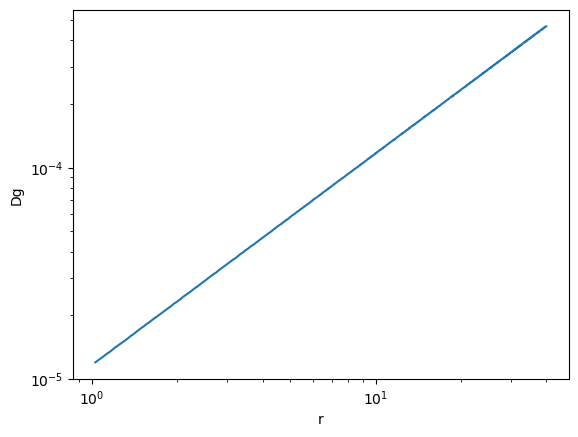

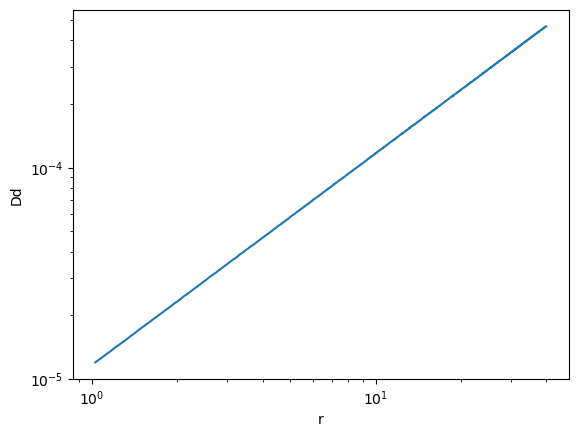

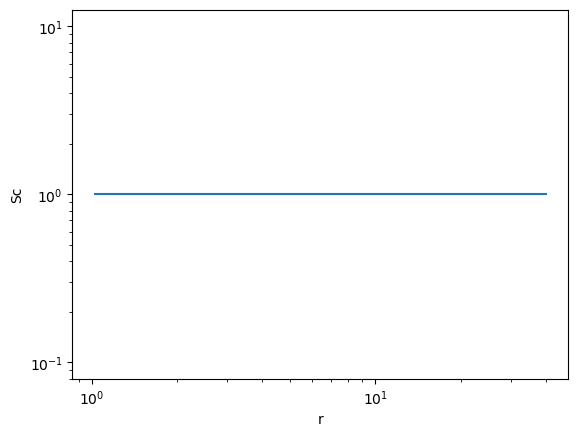

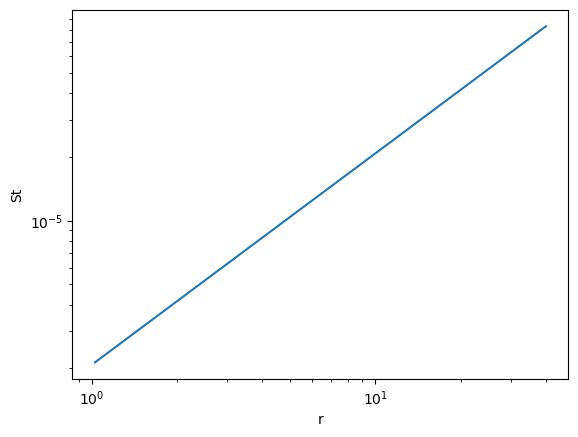

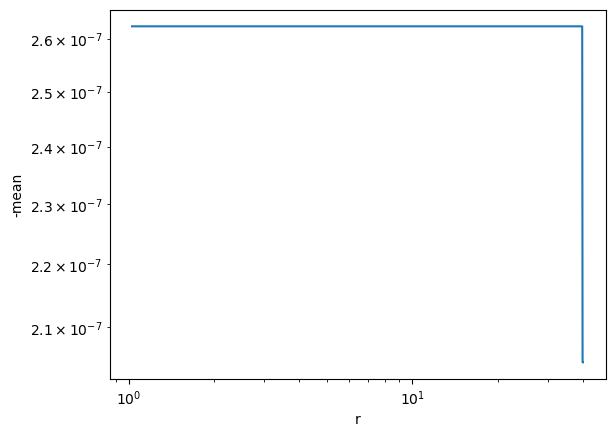

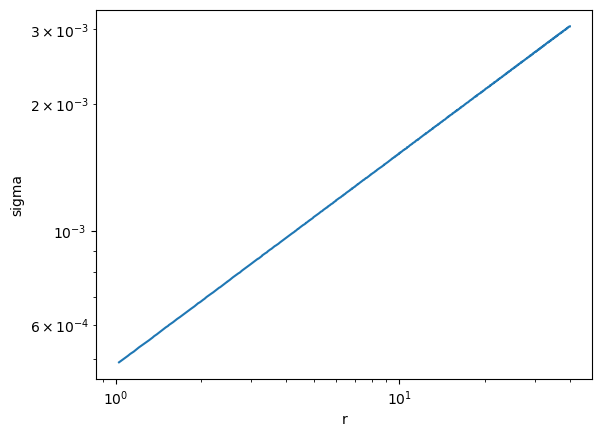

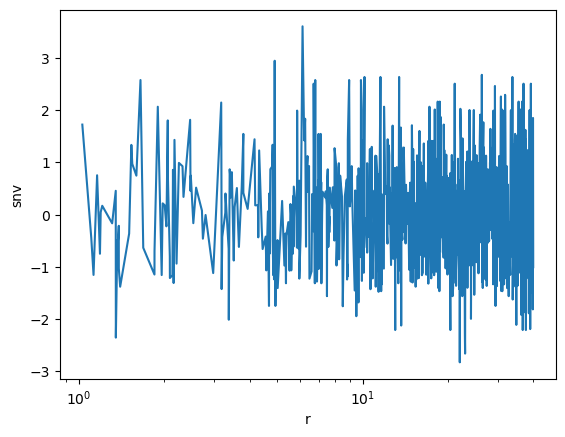

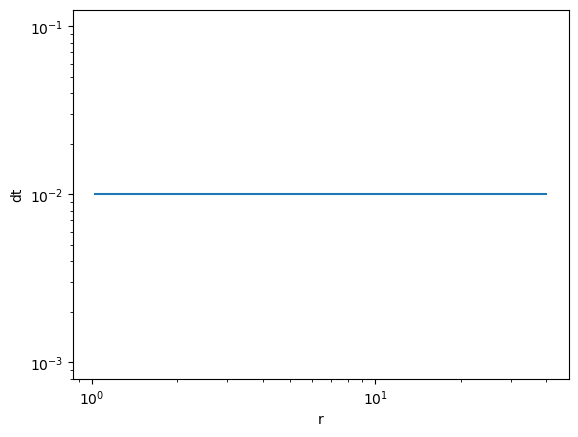

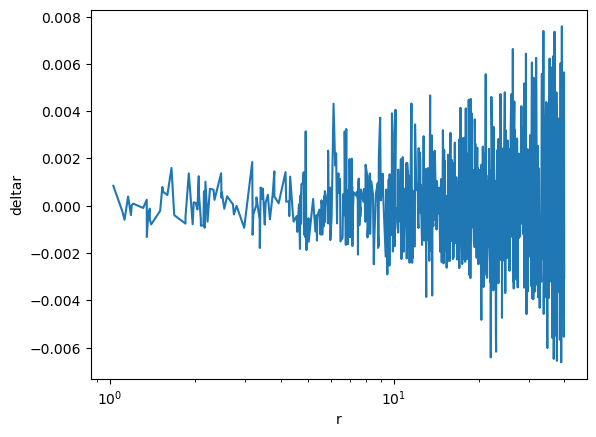

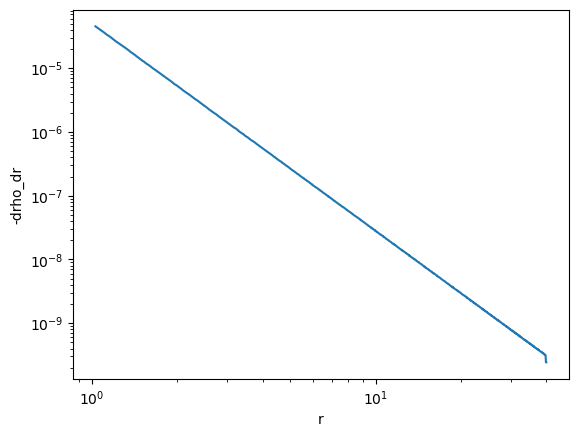

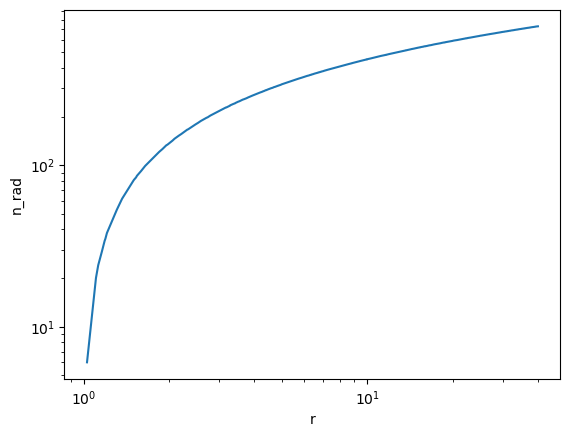

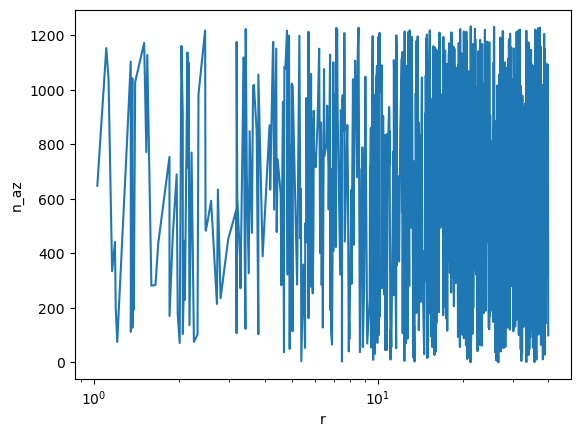

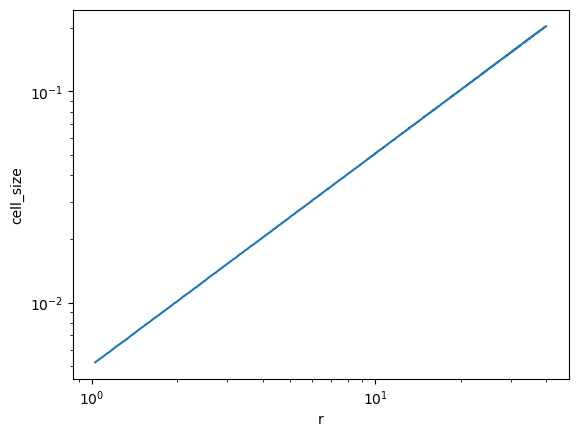

In [27]:
rs = data["r"]
for key, val in data.items():
    if key == "r":
        continue
    fig, ax = plt.subplots()
    ax.set_xlabel("r")
    ax.set_ylabel(key)
    ax.set_xscale("log")
    if all(val > 0):
        ax.plot(rs, val)
        ax.set_yscale("log")
    elif all(val < 0):
        ax.plot(rs, -val)
        ax.set_yscale("log")
        ax.set_ylabel("-" + key)
    else:
        ax.plot(rs, val)

        

(array([  4.,  20., 124., 176., 208., 223., 139.,  64.,  26.,  15.,   1.]),
 array([-2.82858, -2.24379, -1.659  , -1.07421, -0.48942,  0.09537,
         0.68016,  1.26495,  1.84974,  2.43453,  3.01932,  3.60411]),
 <BarContainer object of 11 artists>)

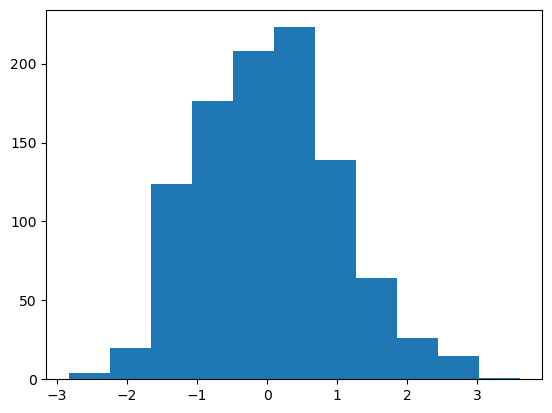

In [32]:
fig, ax = plt.subplots()
ax.hist(data["snv"],11)

In [33]:
np.mean(data["snv"])

0.01813544914

In [34]:
1/np.sqrt(1000)

0.03162277660168379

In [35]:
data["dt"]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.